In [1]:
import sys
sys.path.append('..')
from test_dali import LSTM, Mat, LSTMState, StackedLSTM

import pickle
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = LSTMState(Mat([1,2,3]), Mat([4,2,1]))
print(s.dtype)
print(s.memory.w)
print(s.hidden.w)

float32
[[ 1.  2.  3.]]
[[ 4.  2.  1.]]


In [3]:
l = LSTM(2, 5)

In [4]:
i = Mat([[1, 2]])
h = l.initial_states()
print(i.__repr__())
print(h.hidden.__repr__())
print(h.memory.__repr__())
h = l.activate(i, h)
print(h.hidden.__repr__())
print(h.memory.__repr__())

[
    [  1.000   2.000]
]

[
    [  0.000   0.000   0.000   0.000   0.000]
]

[
    [  0.000   0.000   0.000   0.000   0.000]
]

[
    [ -0.041   0.092   0.022  -0.148   0.075]
]

[
    [ -0.148   0.157   0.054  -0.404   0.169]
]



In [5]:
print("Activate sequence for 3 different inputs states and one hidden states")
r1 = l.activate_sequence([Mat(3, 2) for i in range(10)], l.initial_states()).memory
print(r1.w)
print("Activate sequence for 3 different hidden states and three different inputs")
r2 = l.activate_sequence([Mat(3, 2) for i in range(10)], LSTMState(Mat(3,5), Mat(3,5))).memory
print(r2.w)
print("Activate sequence for 3 different hidden states and one input (!)")
r3 = l.activate_sequence([Mat(1, 2) for i in range(10)], LSTMState(Mat(3,5), Mat(3,5))).memory
print(r3.w)

Activate sequence for 3 different inputs states and one hidden states
[[-0.14922693  0.25416917  0.24280307 -0.45820007  0.14360353]
 [-0.14922693  0.25416917  0.24280307 -0.45820007  0.14360353]
 [-0.14922693  0.25416917  0.24280307 -0.45820007  0.14360353]]
Activate sequence for 3 different hidden states and three different inputs
[[-0.14922693  0.25416917  0.24280307 -0.45820007  0.14360353]
 [-0.14922693  0.25416917  0.24280307 -0.45820007  0.14360353]
 [-0.14922693  0.25416917  0.24280307 -0.45820007  0.14360353]]
Activate sequence for 3 different hidden states and one input (!)
[[-0.14922693  0.25416917  0.24280307 -0.45820007  0.14360353]
 [-0.14922693  0.25416917  0.24280307 -0.45820007  0.14360353]
 [-0.14922693  0.25416917  0.24280307 -0.45820007  0.14360353]]


In [6]:
INPUTS = [2,3]
HIDDEN_SIZE = 5
NUM_CHILDREN = 3
l = LSTM(INPUTS, HIDDEN_SIZE, NUM_CHILDREN, memory_feeds_gates=True)

In [7]:
idx = random.randint(0, len(l.parameters()) - 1)
print(l.cell_layer)
print(l.forget_layers)
print(l.hidden_size)
print(l.input_sizes)
print(l.input_layer)
print(l.num_children)
print(l.memory_feeds_gates)
print(l.parameters()[idx].w)
l_pickled = pickle.loads(pickle.dumps(l))
print("==== PICKLED ====")

print(l_pickled.cell_layer)
print(l_pickled.forget_layers)
print(l_pickled.hidden_size)
print(l_pickled.input_sizes)
print(l_pickled.input_layer)
print(l_pickled.num_children)
print(l_pickled.memory_feeds_gates)
print(l_pickled.parameters()[idx].w)

<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
[<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>]
5
[2, 3]
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
3
True
[[-0.02097718  0.14071748  0.02983057 -0.14180495 -0.05913816]
 [-0.00718732  0.17062435  0.129556   -0.11555042  0.1381399 ]
 [-0.07139292 -0.17151463 -0.16027422  0.19166744 -0.05134377]]
==== PICKLED ====
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
[<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>]
5
[2, 3]
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
3
True
[[-0.02097718  0.14071748  0.02983057 -0.14180495 -0.05913816]
 [-0.00718732  0.17062435  0.129556   -0.11555042  0.1381399 ]
 [-0.07139292 -0.17151463 -0.16027422  0.19166744 -0.05134377]]


In [8]:
hs = [l.initial_states() for _ in range(NUM_CHILDREN)]
i = [Mat(1, ipt) for ipt in INPUTS]

h_combined = l.activate(i, hs)
print(h_combined.hidden.__repr__())
print(h_combined.memory.__repr__())

[
    [  0.052   0.040   0.026  -0.001   0.021]
]

[
    [  0.112   0.089   0.047  -0.002   0.039]
]



In [9]:
l.Wcells_to_forgets[0]

[
    [ -0.246  -0.396   0.444   0.312   0.144]
]

In [10]:
x = StackedLSTM([1,2], [5,4])

In [17]:
new_state = x.activate([
    Mat([[1]]),
    Mat([[1, 2]])
],
x.initial_states(),
0.5
)
new_state[0].memory

[
    [  0.216  -0.157   0.098  -0.395   0.266]
]

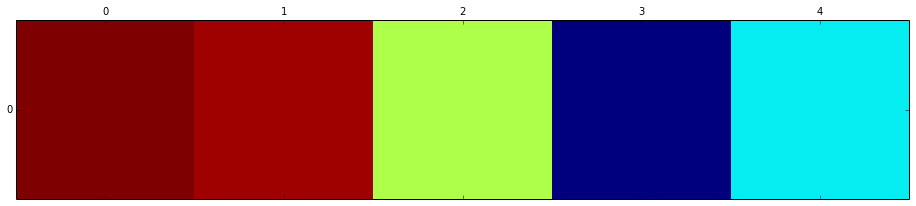

In [13]:
plt.matshow(x.cells[0].forget_layers[0].matrices[0].w)

In [33]:
?l.activate_sequence